<a href="https://colab.research.google.com/github/ayuksekdag/winacademy_python_dna/blob/main/final_assignment/final_co2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment / Questions

- What is the biggest predictor of a large CO2 output per capita of a country?
- Which countries are making the biggest strides in decreasing CO2 output?
- Which non-fossil fuel energy technology will have the best price in the future?

Biggest predictor of CO2 output

To determine this you may want to consider things like GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.

Your answer can also be a specific combination of certain factors. Anyway, remember to include the explanations in your report.


Biggest strides in decreasing CO2 output

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.


Biggest strides in decreasing CO2 output

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

In [66]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Scope of sources

- source 1: https://ourworldindata.org/co2-emissions#per-capita-co2-emissions
  - filename: co2-per-capita-marimekko.csv
  - alias: co2_cap

- source 2: https://ourworldindata.org/grapher/per-capita-energy-use
  - filename: gdp-per-capita-worldbank
  - alias: gdp_cap

- source 3: https://ourworldindata.org/grapher/levelized-cost-of-energy
  - filename:levelized-cost-of-energy.csv
  - alias: cost_engy


In [67]:
co2_cap = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/co2-per-capita-marimekko.csv')
gdp_cap = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/gdp-per-capita-worldbank.csv')
cost_engy = pd.read_csv('https://raw.githubusercontent.com/ayuksekdag/winacademy_python_dna/main/final_assignment/levelized-cost-of-energy.csv')

In [111]:
# co2_cap.head(3)
# gdp_cap.head(3)
#cost_engy.head(3)

# Data preparation
Renaming columns

Data conversions
  - year column to date

Cleaning of data.
  - Goal: All datasets must have same countries and same selection of years
  - How: To achieve this I take a inner join (intersection) of all datasets on country and year of the measure.


In [69]:
#rename long column names with spaces and special characters
co2_cap.rename(columns={'Annual CO₂ emissions (per capita)': 'c02'}, inplace=True)
gdp_cap.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'gdp'}, inplace=True)
# print(gdp_cap.dtypes)
# print(co2_cap.dtypes)

In [70]:
#change datatype year to datetime
co2_cap['Year'] = pd.to_datetime(co2_cap['Year'], format='%Y')
gdp_cap['Year'] = pd.to_datetime(gdp_cap['Year'], format='%Y')

# print(co2_cap.dtypes)
# print(gdp_cap.dtypes)

# print(f' \n grootte co2_cap  {co2_cap.shape}')
# print(f' \n grootte gdp_cap {gdp_cap.shape}')


In [71]:
# INTERSECTION INNER JOIN TO CREATE
# 1 DATASET BASED ON COUNTRY AND YEAR.


merged_co2_gdp = (
    pd.merge(co2_cap,gdp_cap, how="inner", on=['Year','Code'], suffixes=('', '_y'))
    .drop(['Entity_y','Continent'], axis=1)
)

# print(merge_co2_gdp.dtypes, '\n')

merged_co2_gdp_engy = (
    pd.merge(merged_co2_gdp ,engy_cap, how="inner", on=['Year','Code'], suffixes=('', '_y'))
    .drop(['Entity_y','Code'], axis=1)
)

print(f'final dataset struct merged_co2_gdp_engy \n\n{merged_co2_gdp_engy.dtypes}')



final dataset struct merged_co2_gdp_engy 

Entity                        object
Year                  datetime64[ns]
c02                          float64
gdp                          float64
energy_consumption           float64
dtype: object


### Question / Answer 1:
- Q: What is the biggest predictor of a large CO2 output per capita of a country?
- A: There is a direct correlation between GDP and Co2 emmission. In general higher GDP per capita ends up in more energy consumption and creation of more C02 emission  



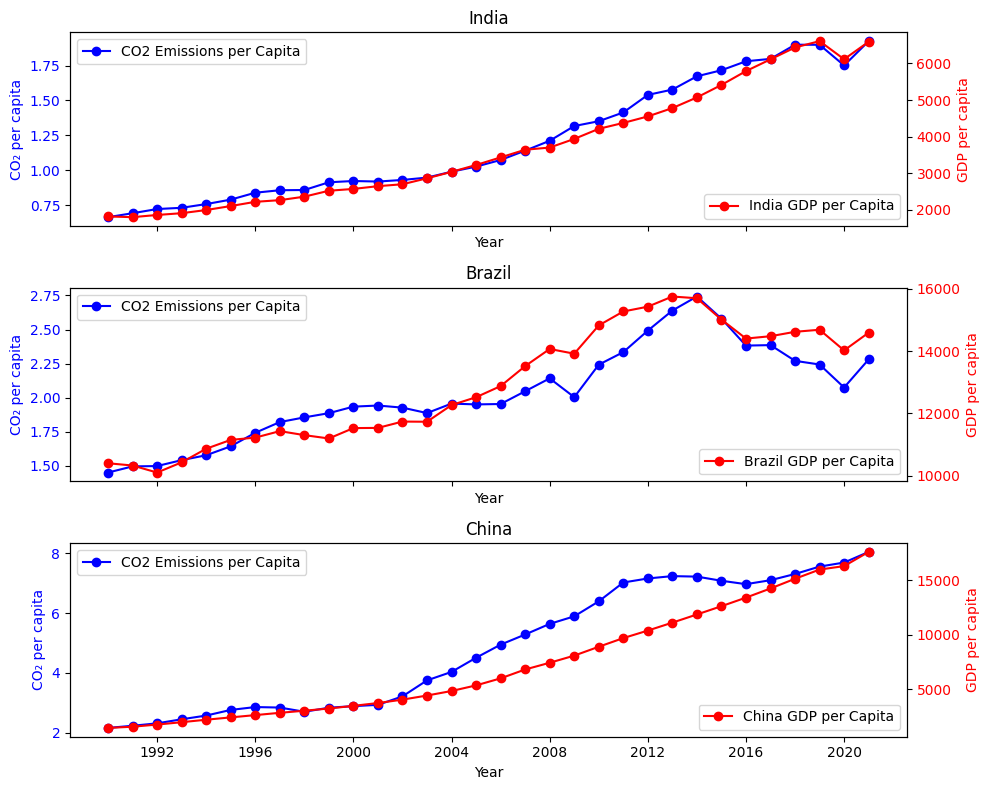

In [72]:
#take 3 countries to examine
# 3 Bricks: China & India and Brazil
countries_to_plot = {"China", "India", "Brazil"}

# Create subplots
fig, ax = plt.subplots(len(countries_to_plot), 1, figsize=(10, 8), sharex=True)

c02_color='blue'
gdp_color='red'

#loop for every county
for i, country in enumerate(countries_to_plot):

  df = merged_co2_gdp_engy[merged_co2_gdp_engy["Entity"] == country]

  # Plot the first measure c02  on the left y-axis
  # x-axis is year (shared)
  ax[i].set_title(f"{country}")
  ax[i].plot(df["Year"], df["c02"], label="CO2 Emissions per Capita", marker='o', color="blue")

  ax[i].set_ylabel('CO₂ per capita', color=c02_color)
  ax[i].tick_params(axis='y', labelcolor=c02_color)
  ax[i].set_xlabel("Year")
  ax[i].legend()

  # Create a second y-axis for measure gdp on the right side
  # with a shared x-axis using year
  ax2 = ax[i].twinx()

  # Plot the second dataset on the right y-axis
  ax2.plot(df["Year"], df["gdp"], label=f"{country} GDP per Capita", marker='o', color="red")
  ax2.set_ylabel('GDP per capita', color=gdp_color)
  ax2.tick_params(axis='y', labelcolor=gdp_color)
  ax2.legend(loc='lower right')

#plot it
plt.tight_layout()
plt.show()



### Question / Answer 2:
- Q: Which countries are making the biggest strides in decreasing CO2 output?
- A: We take the highest C02 emission by Entity. Then we look at the latest Year C02 emmission. The entity with the largest absolute difference are striding hardest.
The top 10 is listed in a stacked bar chart

<Axes: title={'center': 'Countries making biggest decrease of C02'}, xlabel='Entity', ylabel='c02'>

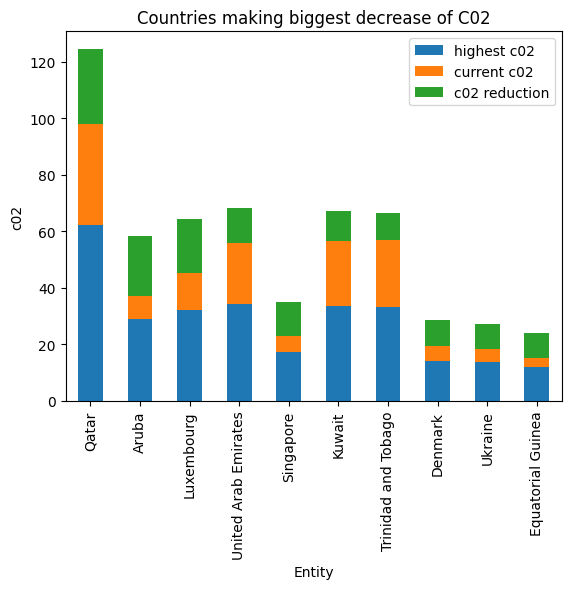

In [73]:
#get the max c02 by Entity
entity_max_c02= (merged_co2_gdp_engy
 .groupby('Entity')['c02']
 .agg(['max'])
)

#rename columm
entity_max_c02 = entity_max_c02.rename(columns={'max': 'max_c02'})

#get the max current data driven
entity_max_year = (merged_co2_gdp_engy
 .groupby('Entity')['Year']
 .agg({'max'}).reset_index()
)
#rename column
entity_max_year = entity_max_year.rename(columns={'max': 'Year'})

#merge the above sets on Entity
entity_c02_of_max_year = (
    pd.merge(
        entity_max_year, entity_max_c02, how="inner", on=['Entity'],suffixes=('', '_y'),sort=False
        )
    #  .drop(['Entity_y',"Year_y"], axis=1)

)


#merge again now to get the current c02 value on same row
entity_max_c02_and_max_year_c02=(
        pd.merge(
            entity_c02_of_max_year, co2_cap, how="inner", on=['Entity','Year'],suffixes=('', '_y'),sort=False
        )
        .drop(['Code',"Continent"], axis=1)
)

# derived column c02_difference
entity_max_c02_and_max_year_c02['c02_difference'] = entity_max_c02_and_max_year_c02['max_c02'] - entity_max_c02_and_max_year_c02['c02']


#prep for plot
entity_max_c02_and_max_year_c02.drop(['Year'], axis=1, inplace=True)
entity_max_c02_and_max_year_c02.set_index('Entity', inplace=True)
entity_max_c02_and_max_year_c02 = entity_max_c02_and_max_year_c02.rename(columns={'c02': 'current c02', 'max_c02': 'highest c02', 'c02_difference': 'c02 reduction'})


#plot it
(entity_max_c02_and_max_year_c02
   .sort_values('c02 reduction', ascending=False ).head(10)
   .plot(kind='bar', stacked=True
         , ylabel='c02'
         , title='Countries making biggest decrease of C02'
   )
)

### Question / Answer 3:
- Q: Which non-fossil fuel energy technology will have the best price in the future?
- A: take the all on rows on World level. Plot it using x-axis Year
Onshore seems to be lowest and going lower. Solar is following up.

In [79]:
cost_engy.dtypes

Entity                                                object
Code                                                  object
Year                                                   int64
Bioenergy levelized cost of energy                   float64
Geothermal levelized cost of energy                  float64
Offshore wind levelized cost of energy               float64
Solar photovoltaic levelized cost of energy          float64
Concentrated solar power levelized cost of energy    float64
Hydropower levelized cost of energy                  float64
Onshore wind levelized cost of energy                float64
dtype: object

In [84]:
cost_engy.rename(columns={'Bioenergy levelized cost of energy': 'bioenergy',
                        'Geothermal levelized cost of energy':'geothermal',
                        'Offshore wind levelized cost of energy':'offshore_wind',
                        'Solar photovoltaic levelized cost of energy':'solar',
                        'Concentrated solar power levelized cost of energy':'concentrated_solar',
                        'Hydropower levelized cost of energy':'hydro',
                        'Onshore wind levelized cost of energy':'onshore_wind'
                        }, inplace=True)

cost_engy.dtypes

Entity                 object
Code                   object
Year                    int64
bioenergy             float64
geothermal            float64
offshore_wind         float64
solar                 float64
concentrated_solar    float64
hydro                 float64
onshore_wind          float64
dtype: object

In [106]:
df = cost_engy[cost_engy.Entity.isin(['World'])].copy()

#drop the unnecessary columns for the plot dataset
df.drop(['Entity','Code'], axis=1, inplace=True)

# set the x-axis ready for plot
df.set_index('Year', inplace=True)

#df.dtypes


bioenergy             float64
geothermal            float64
offshore_wind         float64
solar                 float64
concentrated_solar    float64
hydro                 float64
onshore_wind          float64
dtype: object

<Axes: title={'center': 'Non fossil fuel energy costs'}, xlabel='Year', ylabel='price $/kwh'>

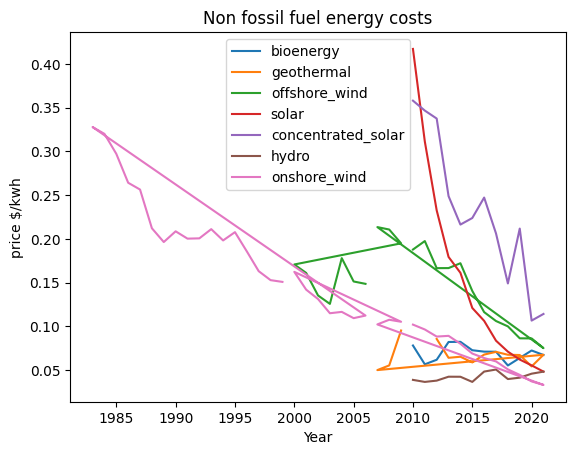

In [110]:
(
    df.plot(kind='line',
          ylabel='price $/kwh',
            title='Non fossil fuel energy costs')
)